In [234]:
import numpy as np
import pandas as pd
import math
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [235]:
train_df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\ML_regression\\databases\\train.csv")
test_df =  pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\ML_regression\\databases\\test.csv")

In [236]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                         0
date                                       0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                              1774
Day_of_week                             1774
Load_Type                                  0
Usage_kWh                                  0
dtype: int64


In [237]:
imputer_mean_1 = SimpleImputer(missing_values=np.nan, strategy="mean")
train_df['Leading_Current_Reactive_Power_kVarh'] = imputer_mean_1.fit_transform(train_df[['Leading_Current_Reactive_Power_kVarh']])


In [238]:
imputer_mean_2 = SimpleImputer(missing_values=np.nan, strategy="mean")
train_df['Leading_Current_Power_Factor'] = imputer_mean_2.fit_transform(train_df[['Leading_Current_Power_Factor']])


In [239]:
imputer_mode = SimpleImputer(strategy='most_frequent')
train_df['WeekStatus'] = train_df['WeekStatus'].astype(str)
train_df['WeekStatus'] = imputer_mode.fit_transform(train_df[['WeekStatus']]).ravel()


In [240]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%d/%m/%Y %H:%M')
train_df['Day_of_week'] = train_df['date'].dt.day_name()
train_df 
train_df.to_csv("train_processed.csv", index=False)


In [241]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                      0
date                                    0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
Usage_kWh                               0
dtype: int64


In [242]:
# Standardization
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training data
train_df_std = scaler.fit_transform(train_df[['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor' ,'Leading_Current_Power_Factor' , 'NSM'  ]])  # Include multiple variables here
train_df_std = pd.DataFrame(train_df_std, columns=['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor' , 'NSM' ])

# Transform the testing data using the same scaler
test_df_std = scaler.transform(test_df[['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor' ,'Leading_Current_Power_Factor' , 'NSM' ]])  # Include the same variables as in the training data
test_df_std = pd.DataFrame(test_df_std, columns=['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor' ,'Leading_Current_Power_Factor' , 'NSM' ])

# Now train_df_std and test_df_std contain the standardized versions of the original datasets with multiple variables
train_df_std.to_csv("train_processed_Standardization.csv", index=False)


In [243]:
# For train_df_std
min_values_train = train_df_std.min()
max_values_train = train_df_std.max()

# For test_df_std
min_values_test = test_df_std.min()
max_values_test = test_df_std.max()

print("Minimum values for each feature in train_df_std:")
print(min_values_train)
print("\nMaximum values for each feature in train_df_std:")
print(max_values_train)

print("\nMinimum values for each feature in test_df_std:")
print(min_values_test)
print("\nMaximum values for each feature in test_df_std:")
print(max_values_test)


Minimum values for each feature in train_df_std:
Lagging_Current_Reactive.Power_kVarh    0.0
Leading_Current_Reactive_Power_kVarh    0.0
CO2(tCO2)                               0.0
Lagging_Current_Power_Factor            0.0
Leading_Current_Power_Factor            0.0
NSM                                     0.0
dtype: float64

Maximum values for each feature in train_df_std:
Lagging_Current_Reactive.Power_kVarh    1.0
Leading_Current_Reactive_Power_kVarh    1.0
CO2(tCO2)                               1.0
Lagging_Current_Power_Factor            1.0
Leading_Current_Power_Factor            1.0
NSM                                     1.0
dtype: float64

Minimum values for each feature in test_df_std:
Lagging_Current_Reactive.Power_kVarh    0.000000
Leading_Current_Reactive_Power_kVarh    0.000000
CO2(tCO2)                               0.000000
Lagging_Current_Power_Factor           -0.585791
Leading_Current_Power_Factor           -0.142857
NSM                                     0.000000


In [244]:

# Calculate z-scores for each feature in the training dataset
z_scores_train = (train_df_std - train_df_std.mean()) / train_df_std.std()

# Define a threshold for outlier detection (usually |z-score| > 3 is considered an outlier)
threshold = 3

# Find outliers
outliers_train = np.abs(z_scores_train) > threshold

# Print the count of outliers for each feature
print("Number of outliers for each feature in the training dataset:")
print(outliers_train.sum())

# Now you can handle these outliers as needed, for example, by replacing them with NaNs or applying some transformation.

Number of outliers for each feature in the training dataset:
Lagging_Current_Reactive.Power_kVarh    313
Leading_Current_Reactive_Power_kVarh    374
CO2(tCO2)                                22
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
dtype: int64


In [252]:

# outliers_train contains True for outliers and False for non-outliers

# Replace outliers with the nearest non-outlier value
train_df_cleaned = train_df_std.copy()  # Create a copy of the dataframe to preserve the original data

for column in train_df_std.columns:
    outliers = outliers_train[column]
    column_values = train_df_std[column].values
    
    # Find indices of outliers
    outlier_indices = np.where(outliers)[0]
    
    # Iterate over outlier indices and replace them with the nearest non-outlier value
    for idx in outlier_indices:
        left_idx = idx - 1
        right_idx = idx + 1
        
        # Find the nearest non-outlier value on the left
        while left_idx >= 0 and outliers[left_idx]:
            left_idx -= 1
        
        # Find the nearest non-outlier value on the right
        while right_idx < len(outliers) and outliers[right_idx]:
            right_idx += 1
        
        # Replace outlier with the nearest non-outlier value
        if left_idx >= 0 and not outliers[left_idx]:
            column_values[idx] = train_df_std.iloc[left_idx][column]
        elif right_idx < len(outliers) and not outliers[right_idx]:
            column_values[idx] = train_df_std.iloc[right_idx][column]
    
    # Update the column in the cleaned dataframe
    train_df_cleaned[column] = column_values

# Now, train_df_cleaned contains outliers replaced with the nearest non-outlier values.


In [253]:
# Calculate z-scores for each feature in the training dataset
z_scores_train2 = (train_df_cleaned - train_df_cleaned.mean()) / train_df_cleaned.std()

# Define a threshold for outlier detection (usually |z-score| > 3 is considered an outlier)
threshold = 3

# Find outliers
outliers_train2 = np.abs(z_scores_train2) > threshold

# Print the count of outliers for each feature
print("Number of outliers for each feature in the training dataset:")
print(outliers_train2.sum())


Number of outliers for each feature in the training dataset:
Lagging_Current_Reactive.Power_kVarh    116
Leading_Current_Reactive_Power_kVarh    317
CO2(tCO2)                                 0
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
dtype: int64


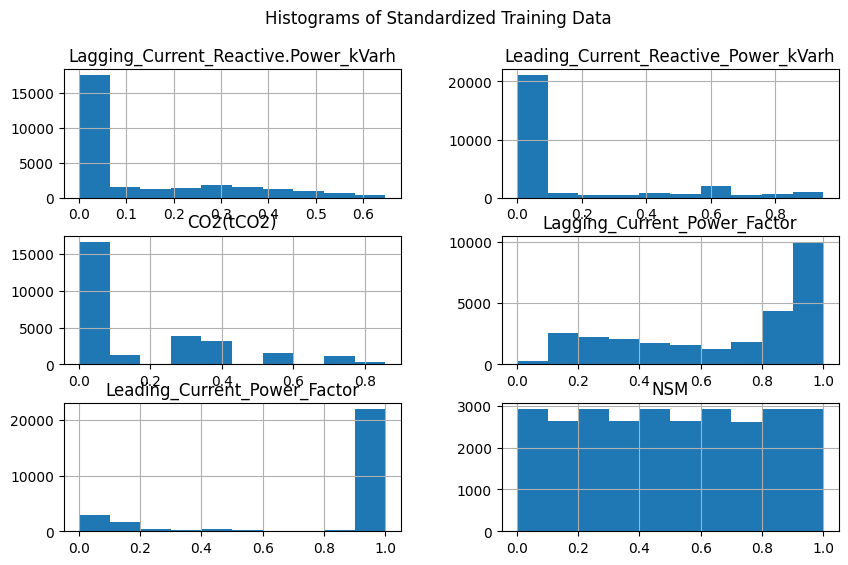

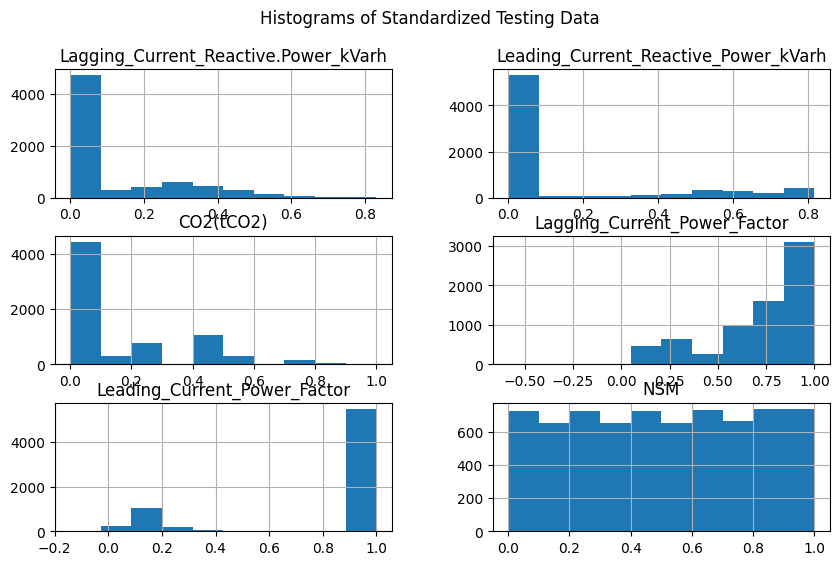

In [254]:
# Plot histograms of the standardized training dataset
train_df_std.hist(figsize=(10, 6))
plt.suptitle('Histograms of Standardized Training Data')
plt.show()

# Plot histograms of the standardized testing dataset
test_df_std.hist(figsize=(10, 6))
plt.suptitle('Histograms of Standardized Testing Data')
plt.show()

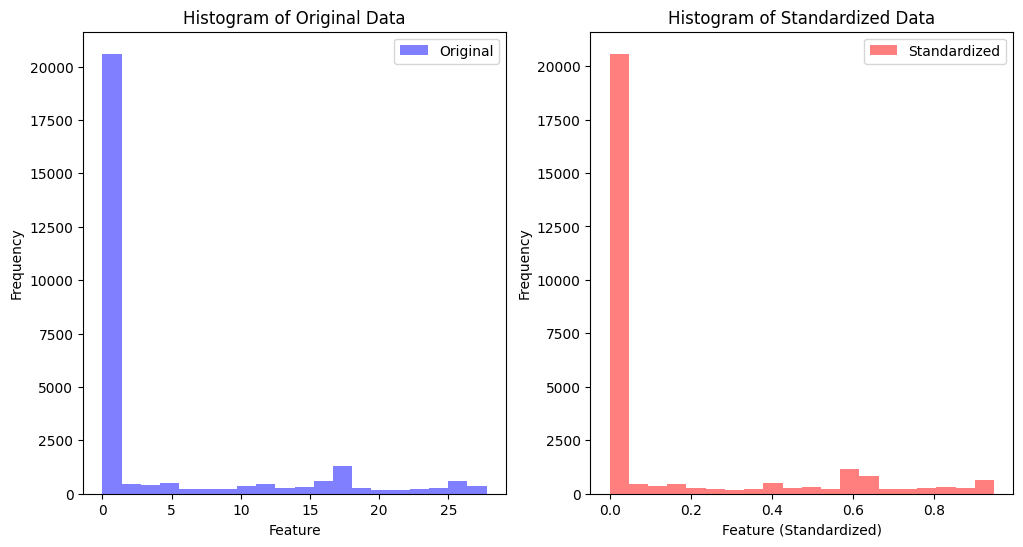

In [255]:

# Plot histograms of the original and standardized datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_df['Leading_Current_Reactive_Power_kVarh'], bins=20, color='blue', alpha=0.5, label='Original')
plt.title('Histogram of Original Data')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(train_df_std['Leading_Current_Reactive_Power_kVarh'], bins=20, color='red', alpha=0.5, label='Standardized')
plt.title('Histogram of Standardized Data')
plt.xlabel('Feature (Standardized)')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [249]:
# Summary statistics of original dataset
print("Summary Statistics of Original Data:")
print(train_df.describe())

# Summary statistics of standardized dataset
print("\nSummary Statistics of Standardized Data:")
print(train_df_std.describe())

Summary Statistics of Original Data:
                Id                           date  \
count  27999.00000                          27999   
mean   14000.00000  2018-05-26 19:45:02.025072384   
min        1.00000            2018-01-01 00:00:00   
25%     7000.50000            2018-03-14 21:52:30   
50%    14000.00000            2018-05-26 19:45:00   
75%    20999.50000            2018-08-07 17:37:30   
max    27999.00000            2018-10-19 15:45:00   
std     8082.75943                            NaN   

       Lagging_Current_Reactive.Power_kVarh  \
count                          27999.000000   
mean                              13.230912   
min                                0.000000   
25%                                2.740000   
50%                                5.040000   
75%                               22.820000   
max                               96.910000   
std                               16.469935   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
